# Model Explainability & Business Insights
This notebook interprets the churn prediction model and translates findings into business recommendations.

In [1]:
import pandas as pd

## Why Model Interpretation Matters

While model accuracy tells us how well the model predicts churn, interpretation helps us understand *why* customers churn.

Understanding these drivers allows the business to take targeted actions instead of guessing.

In [6]:
df = pd.read_csv("../data/processed/Telco_processed.csv")

In [7]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [8]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

c:\Users\rohit\Documents\Projects\ML-projects\customer-churn-ml\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [12]:
coefficients = pd.DataFrame({
    "Feature": X_encoded.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coefficients.head(10)

,Feature,Coefficient
11,InternetService_Fiber optic,0.591121
9,MultipleLines_No phone service,0.424876
27,PaperlessBilling_Yes,0.327324
29,PaymentMethod_Electronic check,0.324226
10,MultipleLines_Yes,0.206264
0,SeniorCitizen,0.158442
24,StreamingMovies_Yes,0.136265
6,Partner_Yes,0.074295
22,StreamingTV_Yes,0.027801
2,MonthlyCharges,0.014424


## Key Churn Drivers Identified by the Model

Positive coefficients indicate features that increase churn risk.

From the model:
- Fiber optic internet users are more likely to churn.
- Customers paying via electronic check show higher churn.
- Paperless billing customers churn more often.
- Senior citizens have slightly higher churn risk.

These features represent customers with higher prices, lower switching friction, or weaker long-term commitment.

In [15]:
df.groupby("Segment")["Churn"].mean()

Segment
0    0.050000
1    0.154250
2    0.246624
3    0.482410
Name: Churn, dtype: float64

## Churn Risk by Customer Segment

Segment 3 has the highest churn rate, making it the most at-risk customer group.
Segment 0 has the lowest churn rate and represents loyal, long-term customers.

This segmentation allows the business to focus retention efforts where they matter most.

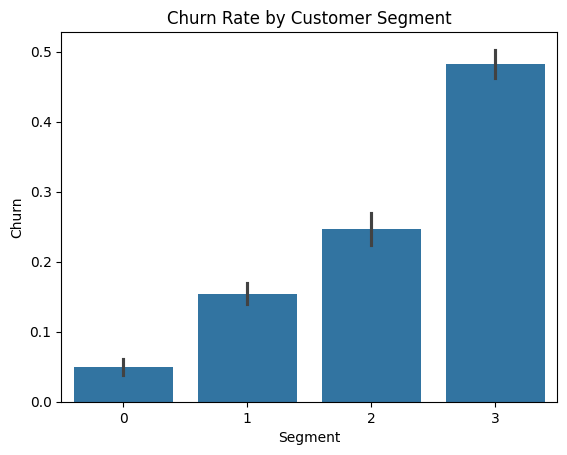

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Segment", y="Churn", data=df)
plt.title("Churn Rate by Customer Segment")
plt.show()

## Business Recommendations

1. Prioritize retention campaigns for Segment 3 customers.
2. Offer long-term contracts or discounts to high monthly charge users.
3. Encourage auto-payment methods to reduce churn risk.
4. Provide targeted support for senior customers.

## Conclusion

This project demonstrates an end-to-end churn analysis pipeline, combining segmentation, prediction, and interpretation.

By understanding both *who* is likely to churn and *why*, businesses can take proactive actions to reduce customer loss.